<a href="https://colab.research.google.com/github/JakeOh/202505_BD50/blob/main/lab_da/ml03_train_test_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   훈련 셋과 테스트 셋을 나누는 방법
    *   순차 추출(sequential sampling)
    *   임의 추출(random sampling)
    *   층화 추출(stratified sampling)
*   분류 모델의 평가 지표(metrics)
    *   정확도(accuracy)
    *   정밀도(precision)
    *   재현율(recall)
    *   F1 score
*   특성 스케일링(feature scaling)
    *   표준화(standardization)
    *   정규화(normalization)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier  # 머신러닝 모델
from sklearn.model_selection import train_test_split  # 훈련/테스트 셋 분리 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # 평가 지표
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # 변환기(특성 스케일링)

# 데이터셋 준비

fish 데이터셋 - 도미(Bream)/빙어(Smelt) 분류

In [2]:
file_path = 'https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/fish.csv'

In [3]:
fish = pd.read_csv(file_path)

In [4]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
df = fish.loc[fish.Species.isin(['Bream', 'Smelt']), ['Species', 'Weight', 'Length']]

In [8]:
df.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [9]:
pd.options.display.max_rows = 10

In [10]:
df

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [11]:
# 특성 배열
X = df[['Weight', 'Length']].values

In [12]:
X[:5, :]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [15]:
# 타겟 배열(레이블)
y = df['Species'].values

In [16]:
y

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

# 훈련 셋/테스트 셋 분리

머신 러닝: 컴퓨터가 데이터를 학습해서 스스로 예측.

학습/훈련: 머신 러닝 알고리즘(모델)에게 데이터(와 레이블)을 제공.

평가: 학습된 데이터와 학습되지 않은 데이터를 얼마나 잘 예측.

훈련 셋: 모델에게 제공할 데이터(와 레이블).

테스트 셋: 학습되지 않은 데이터를 얼마나 잘 예측하는 지 평가하기 위해 남겨두는 데이터(와 레이블).

## 순차 추출(sequential sampling)

In [21]:
num_trains = 35  # 훈련 셋의 샘플 개수 - 전체 데이터셋의 약 70% 샘플링.

In [22]:
X_train = X[:num_trains, :]  # 훈련 셋
X_test = X[num_trains:, :]   # 테스트 셋

In [24]:
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [25]:
y_train = y[:num_trains]  # 훈련 레이블
y_test = y[num_trains:]   # 테스트 레이블

In [27]:
y_train.shape, y_test.shape

((35,), (14,))

In [28]:
y_train

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [29]:
y_test

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

정렬된 데이터셋을 사용하는 경우 훈련되지 않는 레이블들이 있을 수 있음.

In [30]:
knn = KNeighborsClassifier()  # 모델 생성

In [31]:
knn.fit(X_train, y_train)  # 훈련 셋으로 훈련(학습)

KNeighborsClassifier()

In [33]:
train_acc = knn.score(X_train, y_train)  # 훈련 셋에서의 정확도
train_acc

1.0

In [34]:
test_acc = knn.score(X_test, y_test)  # 테스트 셋에서의 정확도
test_acc

0.0

In [35]:
knn.predict(X_test)  # 테스트 셋의 예측값들

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

## 임의 추출(random sampling)

In [36]:
indices = np.arange(49)
print(indices)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [37]:
np.random.seed(1)
np.random.shuffle(indices)  # 배열의 원소들을 무작위로 섞어줌(순서 변경).
print(indices)

[27 34 39 48  2  3 42 29 45 30 31 38 21 35 19 41 36 26 22 13 40 17 44 24
 23  4 32 14 10 28 47 33 18 20 25  6  7 46  1 16  0 15  5 11  9  8 12 43
 37]


In [40]:
train_indices = indices[:num_trains]  # 훈련 셋으로 사용할 샘플들의 인덱스
test_indices = indices[num_trains:]   # 테스트 셋으로 사용할 샘플들의 인덱스
print(train_indices)
print(test_indices)

[27 34 39 48  2  3 42 29 45 30 31 38 21 35 19 41 36 26 22 13 40 17 44 24
 23  4 32 14 10 28 47 33 18 20 25]
[ 6  7 46  1 16  0 15  5 11  9  8 12 43 37]


In [41]:
X_train = X[train_indices]  # 훈련 셋
X_test = X[test_indices]    # 테스트 셋

In [43]:
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [44]:
y_train = y[train_indices]  # 훈련 레이블
y_test = y[test_indices]    # 테스트 레이블

In [45]:
print(y_train)
print(y_test)

['Bream' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt'
 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Smelt' 'Bream'
 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream']
['Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Smelt' 'Smelt']


In [48]:
values, counts = np.unique(y_train, return_counts=True)
print(values)
print(counts)

['Bream' 'Smelt']
[24 11]


In [49]:
counts / num_trains  # Bream(도미)과 Smelt(빙어)의 비율

array([0.68571429, 0.31428571])

In [50]:
values, counts = np.unique(y_test, return_counts=True)
print(values)
print(counts)

['Bream' 'Smelt']
[11  3]


In [51]:
counts / 14

array([0.78571429, 0.21428571])

In [52]:
knn = KNeighborsClassifier()  # KNN 모델 생성

In [53]:
knn.fit(X_train, y_train)  # 모델 훈련(학습)

KNeighborsClassifier()

In [54]:
knn.score(X_train, y_train)  # 훈련 셋에서의 정확도

1.0

In [55]:
knn.score(X_test, y_test)  # 테스트 셋에서의 정확도

1.0

임의 추출에서는 전체 샘플에서 각 클래스(도미, 빙어)의 비율이 훈련 셋과 테스트 셋에서 유지되지 않을 수도 있음.

그런 경우, 머신 러닝 모델의 성능이 안 좋아질 수 있음.

전체 샘플에서 각 클래스의 비율이 훈련 셋과 테스트 셋에서도 비슷하게 유지되도록 샘플링하는 것이 중요.

## 층화 추출(stratified sampling)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   train_size=35,   # 훈련 셋 샘플 개수(비율)
                                                   random_state=1,  # 난수 생성 seed
                                                   stratify=y)      # 층화 추출에서 필요한 레이블
# train_test_split 함수의 파라미터:
#   X, y: 훈련/테스트 셋으로 나눌 배열들.
#   test_size: 정수이면 테스트 셋의 샘플 개수, 0 ~ 1 사이의 실수이면 테스트 셋의 비율.
#   train_size: 정수이면 훈련 셋의 샘플 개수, 0 ~ 1 사이의 실수이면 훈련 셋의 비율.
#   test_size 또는 train_size 둘 중 하나가 결정되면, 나머지 하나는 자동으로 계산.
#   shuffle: True=샘플들을 무작위로 섞음. False=샘플들을 섞지 않음. True가 기본값.
#   stratify: 층화 추출의 기준이 되는(각 클래스의 비율을 알 수 있는) 1차원 배열.
#   random_state: 난수 seed 설정값.

In [62]:
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [63]:
y_train.shape, y_test.shape

((35,), (14,))

In [64]:
values, counts = np.unique(y_train, return_counts=True)
print(values)
print(counts)

['Bream' 'Smelt']
[25 10]


In [65]:
counts / 35

array([0.71428571, 0.28571429])

In [66]:
values, counts = np.unique(y_test, return_counts=True)
print(values)
print(counts)

['Bream' 'Smelt']
[10  4]


In [67]:
counts / 14

array([0.71428571, 0.28571429])

In [68]:
knn = KNeighborsClassifier()  # 모델 생성
knn.fit(X_train, y_train)  # 모델 훈련
print('훈련 셋 정확도:', knn.score(X_train, y_train))
print('테스트 셋 정확도:', knn.score(X_test, y_test))

훈련 셋 정확도: 1.0
테스트 셋 정확도: 1.0


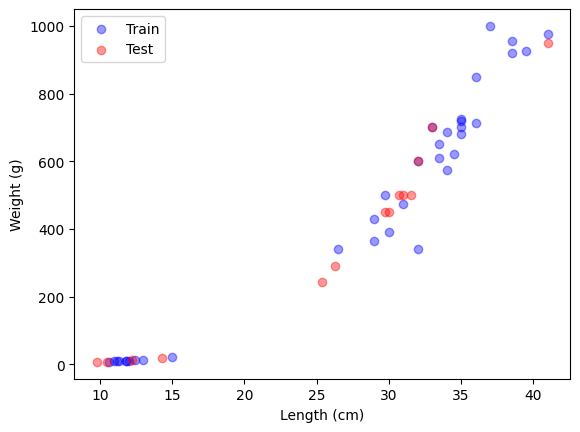

In [70]:
# 훈련 셋과 테스트 셋 시각화
plt.scatter(X_train[:, 1], X_train[:, 0], label='Train', alpha=0.4, color='blue')
plt.scatter(X_test[:, 1], X_test[:, 0], label='Test', alpha=0.4, color='red')

plt.legend()  # 범례 표시
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

# 분류 평가 지표

*   용어 정의
    *   TP(True Positive): 실제 양성인 샘플을 양성으로 맞게 예측한 것.
    *   FN(False Negative): 실제 양성인 샘플을 음성으로 틀리게 예측한 것.
    *   FP(False Positive): 실제 음성인 샘플을 양성으로 틀리게 예측한 것.
    *   TN(True Negative): 실제 음성인 샘플을 음성으로 맞게 예측한 것.

*   정확도(accuracy): 샘플들을 정확하게 분류한 비율. 전체 샘플에서 정답의 비율.

    `accuracy = (TP + TN) / (TP + FN + FP + TN)`

*   정밀도(precision): 양성 예측들 중에서 정답의 비율.

    `precision = TP / (TP + FP)`

*   재현율(recall): 실제 양성 샘플들 중에서 정답의 비율.

    `recall = TP / (TP + FN)`

*   F1 score: 정밀도 재현율의 조화 평균(역수들의 평균의 역수)

    `f1-score = 2/(1/precision + 1/recall)`

In [72]:
test_pred = knn.predict(X_test)  # 테스트 셋의 예측값
confusion_matrix(y_test, test_pred)  # 혼동행렬

array([[10,  0],
       [ 0,  4]])

In [73]:
report = classification_report(y_test, test_pred)
print(report)

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
       Smelt       1.00      1.00      1.00         4

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [74]:
accuracy_score(y_test, test_pred)  # 정확도

1.0

In [76]:
# Bream을 양성(positive)로 간주할 때의 정밀도
precision_score(y_test, test_pred, pos_label='Bream')

1.0

In [77]:
# Bream을 양성으로 간주할 때의 재현율
recall_score(y_test, test_pred, pos_label='Bream')

1.0

In [78]:
# Bream을 양성으로 간주할 때의 f1 score
f1_score(y_test, test_pred, pos_label='Bream')

1.0

# 특성 스케일링(feature scaling)

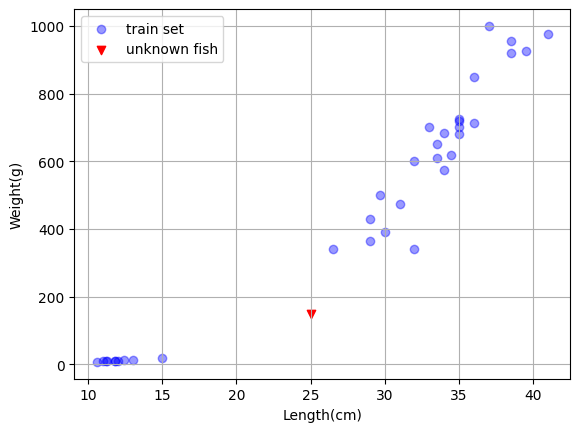

In [87]:
# 훈련 셋(X_train) 시각화
plt.scatter(X_train[:, 1], X_train[:, 0], label='train set', color='blue', alpha=0.4)

# 가상의 물고기(150g, 25cm) 데이터
unknown = np.array([[150, 25]])  # 주의: 특성 배열은 반드시 2차원 배열.
plt.scatter(unknown[:, 1], unknown[:, 0], label='unknown fish', color='red', marker='v')

plt.grid()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.legend()
plt.show()

In [88]:
prediction = knn.predict(unknown)
print(prediction)

['Smelt']


In [90]:
distances, indices = knn.kneighbors(unknown)
print(distances)
print(indices)

[[130.48375378 137.17988191 138.32150953 140.62090883 140.72046759]]
[[ 7  5 15 30 11]]


In [91]:
y_train[indices[0]]

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'], dtype=object)

* 생선의 두 특성(길이, 무게)는 서로 단위(cm, g)가 다르기 때문에, 값의 범위도 매우 다름.
    * 길이 범위: 0 ~ 50 cm, 무게 범위: 0 ~ 1,000 g
    * 특성(변수)들의 스케일이 다름!
    * 가장 가까운 이웃을 찾기 위해서 거리를 계산할 때, 생선의 길이가 거리에 미치는 영향은 생선의 무게가 거리에 미치는 영향에 비해 작음.
    * 예측을 할 때 거리 계산에 영향이 적은 변수(특성)는 무시되기 쉬움.
    * 예측 결과가 부정확해 질 수 있음.
    * 따라서, 모든 특성(변수)들이 거리 계산에 비슷한 영향을 미칠 수 있도록 스케일을 변환할 필요가 있음.
* KNN과 같이 거리 기반의 머신 러닝 알고리즘에서는, 모델을 훈련하기 전에 모든 특성(변수)들을 비슷한 스케일이 되도록 전처리(preprocessing)를 할 필요가 있음!
    * **표준화(standardization)**: *훈련 셋*의 평균과 표준편차를 사용해서, 평균이 0이 되고 표준편차가 1이 되도록 특성 값들의 스케일을 변환하는 것.
    * **정규화(normalization)**: *훈련 셋*의 최솟값과 최댓값을 사용해서, 최솟값은 0이 되고 최댓값은 1이 되도록 특성 값들의 스케일을 변환하는 것.

## 표준화(Standardization)